<a href="https://colab.research.google.com/github/kevinegan31/Udemy_Machnine_Learning_A-Z/blob/main/Python/Regression/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [38]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [39]:
# Reshape y into 2D array
y = y.reshape(len(y),1)

## Feature Scaling

In [40]:
'''
Apply feature scaling (standardization) on the whole matrix of X.
We do not perform train/test split because we are going to provide
a single value for prediction.
We want to scale both X and y because we don't want the feature to be neglected
by the SVR model.
Need to eventually invert transformation to get prediction back to original scale.
'''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [41]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [42]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [43]:
from sklearn.svm import SVR
# Kernels can learn linear or nonlinear relationships in dataset
# radial basis function kernel
svr = SVR(kernel='rbf')
svr.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [44]:
# Need to get the scaled value of 6.5 using the transform method from X
sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

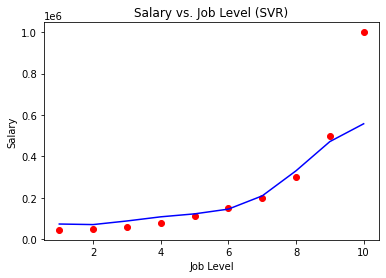

In [50]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
# calling predict on X_train just gives you predictions on that training set
plt.plot(sc_X.inverse_transform(X),
         sc_y.inverse_transform(svr.predict(X).reshape(-1,1)),
         color='blue')
plt.title('Salary vs. Job Level (SVR)')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

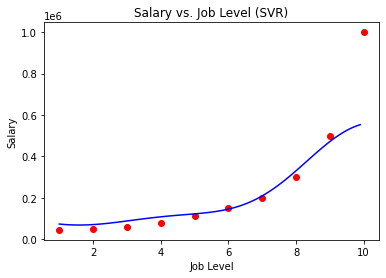

In [54]:
# Create grid for higher resolution and smoother curve
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid,
         sc_y.inverse_transform(svr.predict(sc_X.transform(X_grid)).reshape(-1,1)),
         color='blue')
plt.title('Salary vs. Job Level (SVR)')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()